In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('sharapova1.jpg')
img.shape  #output is 3 values (x,y,rgb value)


(555, 700, 3)

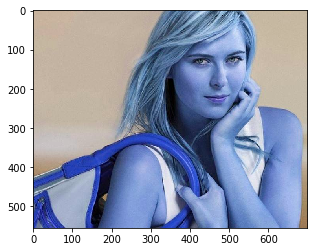

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape   #returns 2 values(x,y) because rgb will be 0 in gray

(555, 700)

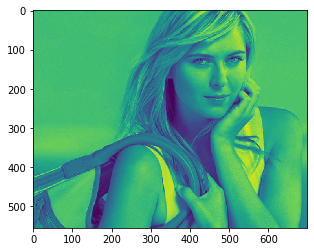

In [5]:
plt.imshow(gray)

In [6]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)  #by using the above front face classifier it detects the face means the width,height of picture
faces

array([[352,  38, 233, 233]], dtype=int32)

In [7]:
(x,y,w,h)=faces[0] #we will store the array in x,y,w,h

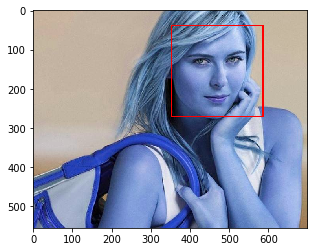

In [8]:
#draw rectangle for the face in image
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #it tells draw a rectangle for img i.e image with x,y,w,h and red as color as 255 is code for rgb
plt.imshow(face_img)

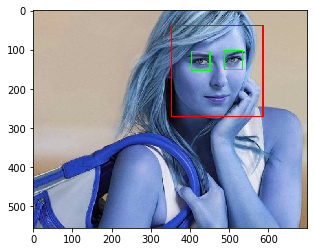

In [9]:
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
for(ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

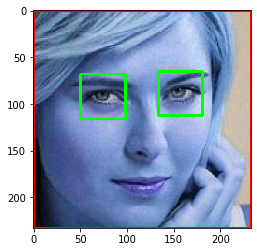

In [10]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [11]:
def get_cropped_img(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=gray[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
        else:
            return None

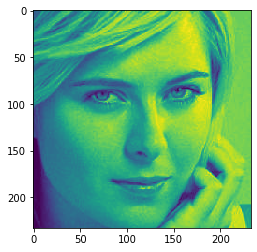

In [12]:
cropped_img=get_cropped_img('sharapova1.jpg')
plt.imshow(cropped_img)

In [13]:
path_to_data="F:\Projects\Imageclassificaion\images_dataset"
path_to_cr_data="F:\Projects\Imageclassificaion\cropped"

In [14]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['F:\\Projects\\Imageclassificaion\\images_dataset\\lionel_messi',
 'F:\\Projects\\Imageclassificaion\\images_dataset\\maria_sharapova',
 'F:\\Projects\\Imageclassificaion\\images_dataset\\roger_federer',
 'F:\\Projects\\Imageclassificaion\\images_dataset\\serena_williams',
 'F:\\Projects\\Imageclassificaion\\images_dataset\\virat_kohli']

In [16]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [17]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_img(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating Cropped Images in Folder:",cropped_folder)
                
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+'/'+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

lionel_messi
Generating Cropped Images in Folder: F:\Projects\Imageclassificaion\croppedlionel_messi
maria_sharapova
Generating Cropped Images in Folder: F:\Projects\Imageclassificaion\croppedmaria_sharapova
roger_federer
Generating Cropped Images in Folder: F:\Projects\Imageclassificaion\croppedroger_federer
serena_williams
Generating Cropped Images in Folder: F:\Projects\Imageclassificaion\croppedserena_williams
virat_kohli
Generating Cropped Images in Folder: F:\Projects\Imageclassificaion\croppedvirat_kohli


In [18]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [20]:
celebrity_file_names_dict

{'lionel_messi': ['F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi1.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi2.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi3.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi4.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi5.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi6.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi7.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi8.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi9.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi10.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi11.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/lionel_messi12.png',
  'F:\\Projects\\Imageclassificaion\\croppedlionel_messi/

In [21]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [27]:
x,y=[],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [28]:
len(x[0])

4096

In [29]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(160, 4096)

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.825

In [54]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.89      0.80      0.84        10
           2       0.70      1.00      0.82         7
           3       0.75      0.75      0.75         8
           4       0.89      1.00      0.94         8

    accuracy                           0.82        40
   macro avg       0.85      0.82      0.82        40
weighted avg       0.85      0.82      0.82        40



In [46]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [47]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [55]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.833333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.666667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.825000,{'logisticregression__C': 1}


In [56]:
best_estimators['svm'].score(x_test,y_test)

0.85

In [57]:
best_estimators['random_forest'].score(x_test,y_test)

0.65

In [58]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [64]:
best_clf = best_estimators['svm']
cm=confusion_matrix(y_test,best_clf.predict(x_test))

Text(69.0, 0.5, 'Truth')

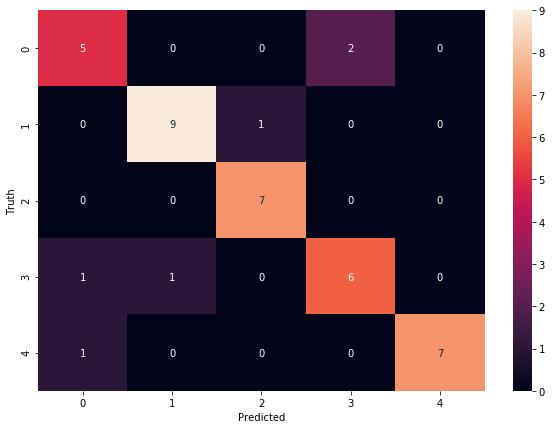

In [65]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
import joblib

In [67]:
joblib.dump(best_clf,'save_model.pkl')

['save_model.pkl']

In [69]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))